# Linear regression

Import all the modules you will need in this notebook here:

In [2]:
# exercise 0
# Put your solution here!
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
# plots a line given an intercept and a slope
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [4]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Put your solution here!
fram = pd.read_csv(get_path('src/fram.txt'), sep='\t')
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [5]:
# exercise 2
# Put your solution here!
def rescale(serie):
    serie = pd.Series(serie)
    mean = serie.mean()
    std = serie.std()
    s2 = serie.apply(lambda x: (x-mean)/(2*std))
    return s2

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [6]:
# exercise 3
# Put your solution here!
fram2 = fram.copy()
cont = ['AGE', 'FRW', 'SBP', 'SBP10', 'DBP', 'CHOL', 'CIG', 'CHD', 'DEATH', 'YRS_DTH']

for col in cont:
    colstr = 's' + col
    fram[colstr] = rescale(fram2[col])


Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [7]:
# exercise 4
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL', data=fram).fit()

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [8]:
# exercise 5
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE', data=fram).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Mon, 04 May 2020   Prob (F-statistic):           2.44e-46
Time:                        16:40:56   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      0.000     148.259     152.080
SEX[T.male]    -4.3805      1.435     -3.053      0.002      -7.195      -1.566
sFRW           16.9771      1.415     11.999      0.000      14.202      19.753
sCHOL           4.2696      1.419      3.009      0.003       1.486       7.053
sAGE            8.1332      1.400      5.810      0.000       5.387      10.879
==============================================================================
Omnibus:                      321.087   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.955
Skew:                           1.206   Prob(JB):                    2.45e-183
Kurtosis:                       5.944   Cond. No.                         2.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

Your solution here

The inclusion of age increases the models explanatory power by a very small margin, we can compare the results of R-squared, Adj. R-squared, AIC, BIC etc. and come to a conclusion that the difference is not significant. However it makes a tiny improvement.

According to coefficients, weight it's the most important factor, then age is the next important factor. However, it is important to keep in mind how much do these variables vary and take it to account as well.
***

Try to add to the model all the interactions with other variables. 

In [9]:
# exercise 6
# Put your solution here!
temp = ['sFRW', 'SEX', 'sCHOL', 'sAGE']
s = ''
for w in temp:
    for w2 in temp:
        if w != w2:
            s += w+':'+w2+' '
            s+='+ '
            
s = 'SBP ~ sFRW + SEX + sCHOL + sAGE + ' + s
s = s[0:len(s)-3]

fit = smf.ols(s, data=fram).fit()

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

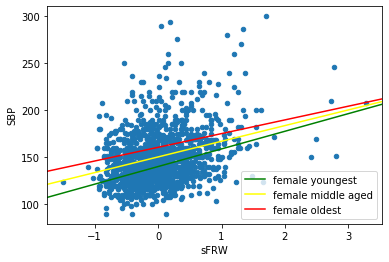

In [10]:
# exercise 7
# Put your solution here!
p = fit.params

fram.plot.scatter("sFRW", "SBP")

int1 = p.Intercept - p["sAGE"]
int2 = p.Intercept
int3 = p.Intercept + p["sAGE"]

slope1 = p.sFRW - p["sFRW:sAGE"]
slope2 = p.sFRW
slope3 = p.sFRW + p["sFRW:sAGE"]

abline_plot(intercept=int1, slope=slope1, ax=plt.gca(), color="green", label="female youngest")
abline_plot(intercept=int2, slope=slope2, ax=plt.gca(), color="yellow", label="female middle aged")
abline_plot(intercept=int3, slope=slope3, ax=plt.gca(), color="red", label="female oldest")
plt.legend()


How does the dependence of blood pressure on weight change as a person gets older?
***

Your solution here.

The dependence lowers as a person gets old, meaning that it lowers the significance of weight compared to bloodpressure when older. 
***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

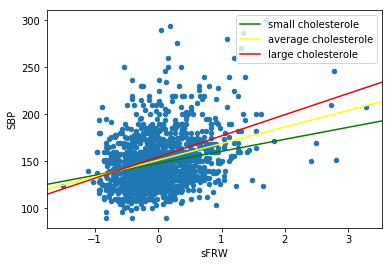

In [9]:
# exercise 8
# Put your solution here!
temp = ['sFRW', 'SEX', 'sCHOL', 'sAGE', 'sCIG']
s = ''
for w in temp:
    for w2 in temp:
        if w != w2:
            s += w+':'+w2+' '
            s+='+ '
            
s = 'SBP ~ sFRW + SEX + sCHOL + sAGE + sCIG + ' + s
s = s[0:len(s)-3]

fit = smf.ols(s, data=fram).fit()


# We checked from fit.summary() that sFRW had the highest coefficient value
# of all the variables, so it is the most important explanatory variable.

p = fit.params

fram.plot.scatter("sFRW", "SBP")

int1 = p.Intercept - p["sCHOL"]
int2 = p.Intercept
int3 = p.Intercept + p["sCHOL"]

slope1 = p.sFRW - p["sFRW:sCHOL"]
slope2 = p.sFRW
slope3 = p.sFRW + p["sFRW:sCHOL"]

abline_plot(intercept=int1, slope=slope1, ax=plt.gca(), color="green", label="small cholesterole")
abline_plot(intercept=int2, slope=slope2, ax=plt.gca(), color="yellow", label="average cholesterole")
abline_plot(intercept=int3, slope=slope3, ax=plt.gca(), color="red", label="large cholesterole")
plt.legend()

How does the model and its accuracy look?

***

Your solution here.

Model does look reasonable, coefficients seem to correlate nicely compared to intuition. I am not sure what is meant by accuracy, but comparing AIC,BIC, R-squared etc. it is quite similar to the previous one.

***

# Logistic regression

In [10]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [11]:
# exercise 9
# Put your solution here!
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.astype('int', copy=False)

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram,
family=sm.families.Binomial()).fit()

error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) |
((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))


Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [12]:
# exercise 10
# Put your solution here!
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE * SEX + sAGE:sFRW", data=fram,
family=sm.families.Binomial()).fit()

error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) |
((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))

print('Original error: %0.5f, New error: %0.5f' % (error_rate_orig, error_rate))

Original error: 0.35581, New error: 0.32783


Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

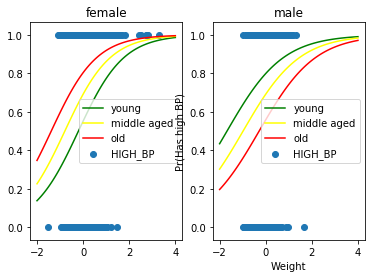

In [13]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!
p = fit.params
X = np.linspace(-2,4,100)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].scatter(fram.sFRW[(fram.SEX=="female")],
fram.HIGH_BP[(fram.SEX=="female")])
ax[0].set_title("female")

ax[1].scatter(fram.sFRW[(fram.SEX=="male")],
fram.HIGH_BP[(fram.SEX=="male")])
ax[1].set_title("male")

plt.xlabel("Weight")
plt.ylabel("Pr(Has high BP)")

ax[0].plot(X, logistic(X*(p.sFRW) + p.Intercept - p["sAGE"]), color='green', label="young")
ax[0].plot(X, logistic(X*(p.sFRW) + p.Intercept), color='yellow', label="middle aged")
ax[0].plot(X, logistic(X*(p.sFRW) + p.Intercept + p["sAGE"]), color='red', label="old")
ax[0].legend()

ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"] + p["sAGE:SEX[T.male]"]) + p.Intercept - p["sAGE:SEX[T.male]"]), color='green', label="young")
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"] + p["sAGE:SEX[T.male]"]) + p.Intercept), color='yellow', label="middle aged")
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"] + p["sAGE:SEX[T.male]"]) + p.Intercept + p["sAGE:SEX[T.male]"]), color='red', label="old")

ax[1].legend()



How do the models with different ages and genders differ from each other?

***
Your solution here.

From the graphs it seems that females have a lower chance of high BP when younger. Generally females are more affected by weight compared to males.

On the contrary to females, males seem to have a higher chance of high BP when younger but the difference between ages smallers when weight increases. 
Males also seem that they are affected less by weight in general.

Comparing these graphs also shows that males have less high BP in the heavier side of the graph (blue diamonds).
***


Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [14]:
# exercise 12
# Put your solution here!
def train_test_split(df, train_fraction=0.8):
    train = df.sample(frac=train_fraction)
    test = df.drop(train.index)
    
    return train,test
    

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [15]:
# exercise 13
np.random.seed(1)
# Put your solution here!
error_model=[]
error_null=[]
for i in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE * SEX + sAGE:sFRW", data=train,
    family=sm.families.Binomial()).fit()
    
    pred = fit.predict(test, transform=True)
    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) |
                        ((pred > 0.5) & (test.HIGH_BP==0)))
    error_model.append(error_rate)
    error_null.append((1-test.HIGH_BP).mean())

print("Mean model error: %0.5f, Mean null error: %0.5f" % (pd.Series(error_model).mean(), pd.Series(error_null).mean()))

Mean model error: 0.33118, Mean null error: 0.34885


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [16]:
# exercise 14
# Put your solution here!
fram['hasCHD'] = fram.CHD > 0
fram.hasCHD = fram.hasCHD.astype('int', copy=False)

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [17]:
# exercise 15
# Put your solution here!
temp = ['sFRW', 'sCHOL', 'sCIG']
s = ''
for w in temp:
    for w2 in temp:
        if w != w2:
            s += w+':'+w2+' '
            s+='+ '
            
s = 'hasCHD ~ sFRW + sCHOL + sCIG + ' + s
s = s[0:len(s)-3]

fit = smf.glm(formula=s, data=fram,
    family=sm.families.Binomial()).fit()

error_rate =  np.mean(((fit.fittedvalues < 0.5) & fram.hasCHD) |
                        ((fit.fittedvalues > 0.5) & ~fram.hasCHD))


Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

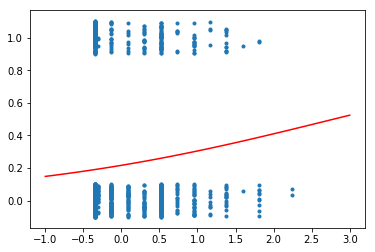

In [18]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!
p = fit.params
X = np.linspace(-1,3,100)
plt.scatter(fram["sCIG"], fram["hasCHD"] + np.random.uniform(-0.10, 0.10, len(fram)), marker = ".")
plt.plot(X, logistic(X*(p.sCIG) + p.Intercept), color="red")


Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
Your solution here.

Considering error rate being 22% it can give pretty good generalizations of what are the risk factors for having CHD. It can give pretty good predictions so I think it could be used somewhere in practise.
***


If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [19]:
# exercise 17
# Put your solution here!
vals = pd.DataFrame([[200,17,100]],columns=['sCHOL', 'sCIG', 'sFRW'])

point = {}
for ind in vals:
    col = ind[1:]
    temp = fram[col].append(vals[ind])
    point[ind] = rescale(temp).iloc[-1]

predicted = fit.predict(point).iloc[0]
print(predicted)

0.2161579953939318
